165034408.0


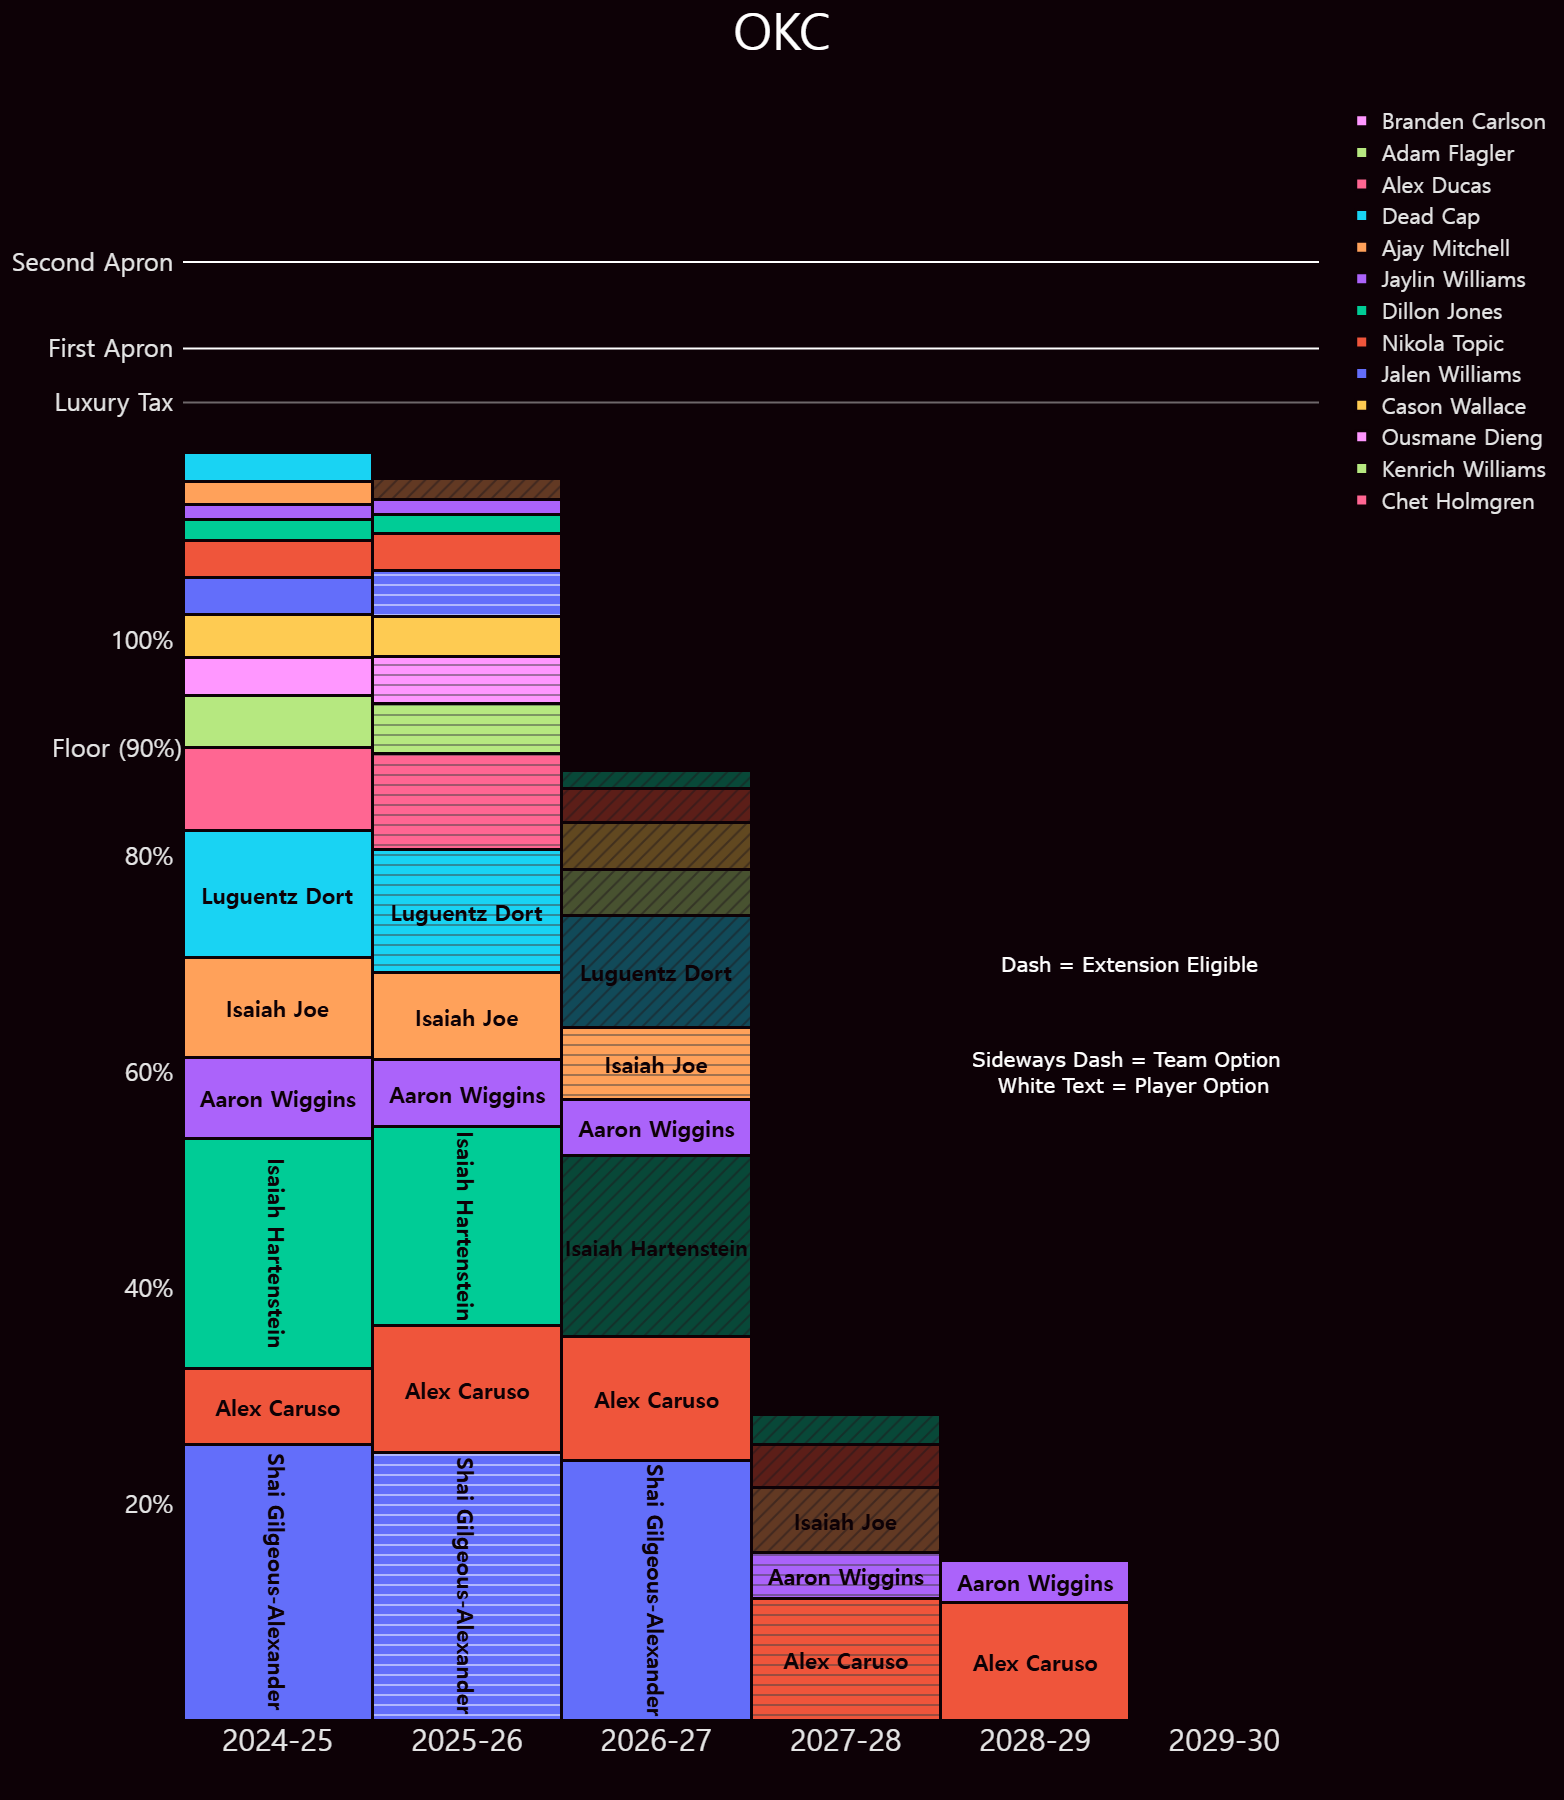

In [14]:
import plotly
import plotly.graph_objects as go
import numpy as np

import pandas as pd

import requests

from plotly.subplots import make_subplots

from nba_api.stats.static import players,teams


def graph_payroll(team):
    cap = pd.read_csv('cap.csv')
    df = pd.read_csv('salary.csv')
    options = pd.read_csv('option.csv')
    df = df[df.Team.str.upper()==team.upper()]
    options = options[options.Team.str.upper()==team.upper()]
    
    salary = dict(zip(cap['Season'],cap['Salary Cap']))
    df = df.sort_values(by='Guaranteed',ascending = False)
    
    players = df['Player'].tolist()
    fig = go.Figure()
    x = ['2024-2025','2025-2026','2026-2027','2027-2028','2028-2029','2029-2030']
    seasons=['2024-25','2025-26','2026-27','2027-28','2028-29','2029-30']
    teamname = team
    print(df['2024-25'].sum())
    for player in players:
        perc_salaries = []
        
        p_df = df[df.Player==player].iloc[0]
        o_df = options[options.Player==player].iloc[0]
        legend = False
        
        player_salaries = df[df.Player==player].iloc[0][seasons].tolist()
        player_options = options[options.Player==player].iloc[0][seasons].tolist()
        marker_shapes=[]
        line_colors= []
        option_positions=[]
        option_count = 0
        
        for year in player_options:
            if year == 'T':
                line_colors.append('#0d0106')
                marker_shapes.append('/')
            elif year == 'P':
                line_colors.append('#e8d8c3')
                marker_shapes.append('')
            elif year =='EE':
                line_colors.append('#0d0106')
                marker_shapes.append('-')
            else:
                line_colors.append('#0d0106')
                marker_shapes.append('')
            option_count+=1
        
        player_options = options[options.Player==player].iloc[0][seasons].tolist()
        team_options = [x =='T' or x=='UFA' for x in player_options]
        player_options = [x =='P' for x in player_options]
        
        opacities = []
        for year in team_options:
            if year ==True:
                opacities.append(.35)
            else:
                opacities.append(1)
                
        i = 0
        for payment in player_salaries:
            perc_salaries.append(100*payment/salary[x[i]])
            i+=1
        
        to_average = [x for x in perc_salaries if pd.isna(x)==False]
        
        player_name=player
        if np.average(to_average)<3:
            legend=True
            player_name=''
            
        # Create hover text with formatted information
        hover_text = []
        for i, salary_val in enumerate(player_salaries):
            if pd.isna(salary_val):
                hover_text.append("")
            else:
                hover_info = f"<b>{player}</b><br>" + \
                            f"Position: {p_df['Pos']}<br>" + \
                            f"Season: {seasons[i]}<br>" + \
                            f"Salary: ${salary_val:,.2f}<br>" + \
                            f"Cap %: {perc_salaries[i]:.1f}%<br>" + \
                            f"Guaranteed Total: ${p_df['Guaranteed']:,.2f}"
                hover_text.append(hover_info)
        
        fig.add_trace(go.Bar(
            x=seasons, 
            y=perc_salaries, 
            name=player,
            marker_color=p_df['Guaranteed'], 
            textposition='inside',
            insidetextanchor='middle',
            showlegend=legend,
            marker_opacity=opacities,
            marker_pattern_shape=marker_shapes,
            marker_line_width=3, 
            marker_line_color='#0d0106',
            text='<b>'+player_name+'<b>',
            textfont=dict(size=22,family='Malgun Gothic',color=line_colors),
            hovertext=hover_text,
            hoverinfo='text'
        ))
    
    tickvals = [i * 20 for i in range(1,6)]
    ticktext = [str(i)+'% ' for i in tickvals]
    tickvals.append(122)
    tickvals.append(127)
    tickvals.append(135)
    fig.add_hline(y=122,line_color="white",opacity=.4)
    fig.add_hline(y=127,line_color="white")
    fig.add_hline(y=135,line_color="white")
    
    ticktext.append('Luxury Tax ')
    ticktext.append('First Apron ')
    ticktext.append('Second Apron ')
    tickvals.append(90)
    ticktext.append('Floor (90%)')

    fig.update_layout(
        barmode='stack',
        bargap=0,
        width=1200,
        height=1800,
        annotations=[
            go.layout.Annotation(
                showarrow=False,
                text='Sideways Dash = Team Option <br> White Text = Player Option',
                font=dict(size=20, color="white"),
                y=60,
                x=4.5,
                xref='x',
                yref='y'
            ),
            go.layout.Annotation(
                showarrow=False,
                text='Dash = Extension Eligible',
                font=dict(size=20, color="white"),
                y=70,
                x=4.5,
                xref='x',
                yref='y'
            ),
        ],
        paper_bgcolor='#0d0106',
        plot_bgcolor='#0d0106',
        title=teamname,
        title_x=.5,
        title_font=dict(color='white', size=50,family="Malgun Gothic"),
        legend={'traceorder':'reversed','font':dict(color='#e5e5e5', size=22,family="Malgun Gothic")},
        yaxis=dict(
            range=(0,150),
            tickmode='array',
            tickvals=tickvals,
            ticktext=ticktext,
        ),
        xaxis=dict(
            ticktext=seasons,
        )
    )
    
    fig.update_yaxes(
        tickfont=dict(color='#e5e5e5', size=25,family="Malgun Gothic"),
        showgrid=False,
        zeroline=False
    )
    
    fig.update_xaxes(
        showgrid=False,
        tickfont=dict(color='#e5e5e5', size=30,family="Malgun Gothic")
    )

    return fig

fig=graph_payroll('OKC')
fig.show()